### Importação dos dados



In [64]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


# Desafio 1 - Data Science
Neste notebook, será realizada uma análise exploratória dos dados da AluraStoreBr. O objetivo é compreender o comportamento das vendas, clientes e produtos, buscando insights e padrões que possam orientar decisões estratégicas.

#1. Análise do faturamento


In [65]:
loja['loja'] = 'Loja 1'
loja2['loja'] = 'Loja 2'
loja3['loja'] = 'Loja 3'
loja4['loja'] = 'Loja 4'

lojas = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)
lojas.columns



Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon', 'loja'],
      dtype='object')

In [66]:
lojas['faturamento'] = lojas['Preço']
faturamento_por_loja = lojas.groupby('loja')['faturamento'].sum().sort_values(ascending=False)
print(faturamento_por_loja)



loja
Loja 1    1534509.12
Loja 2    1488459.06
Loja 3    1464025.03
Loja 4    1384497.58
Name: faturamento, dtype: float64


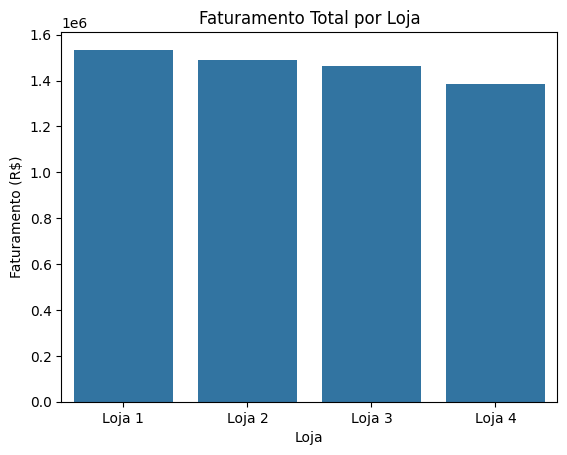

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=faturamento_por_loja.index, y=faturamento_por_loja.values)
plt.title("Faturamento Total por Loja")
plt.ylabel("Faturamento (R$)")
plt.xlabel("Loja")
plt.show()


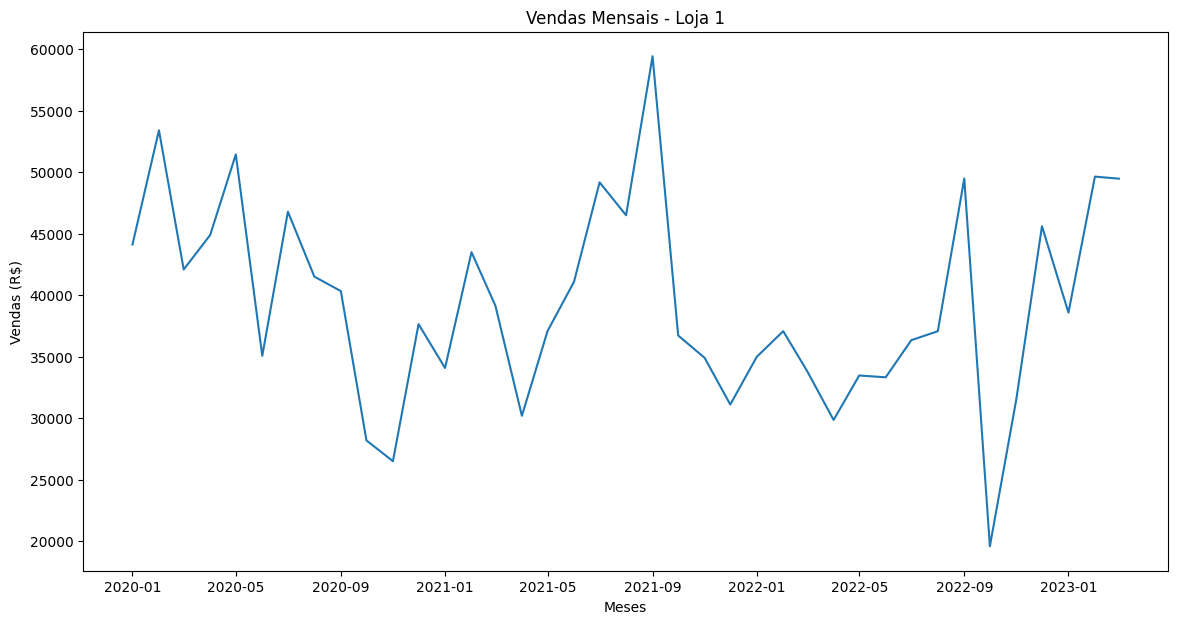

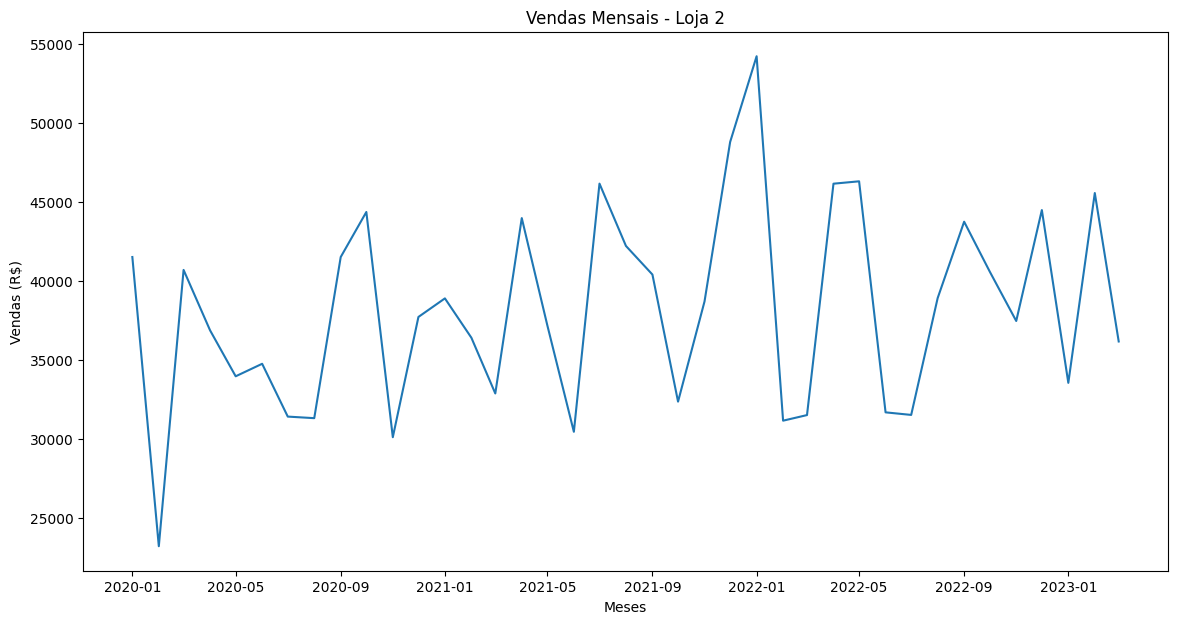

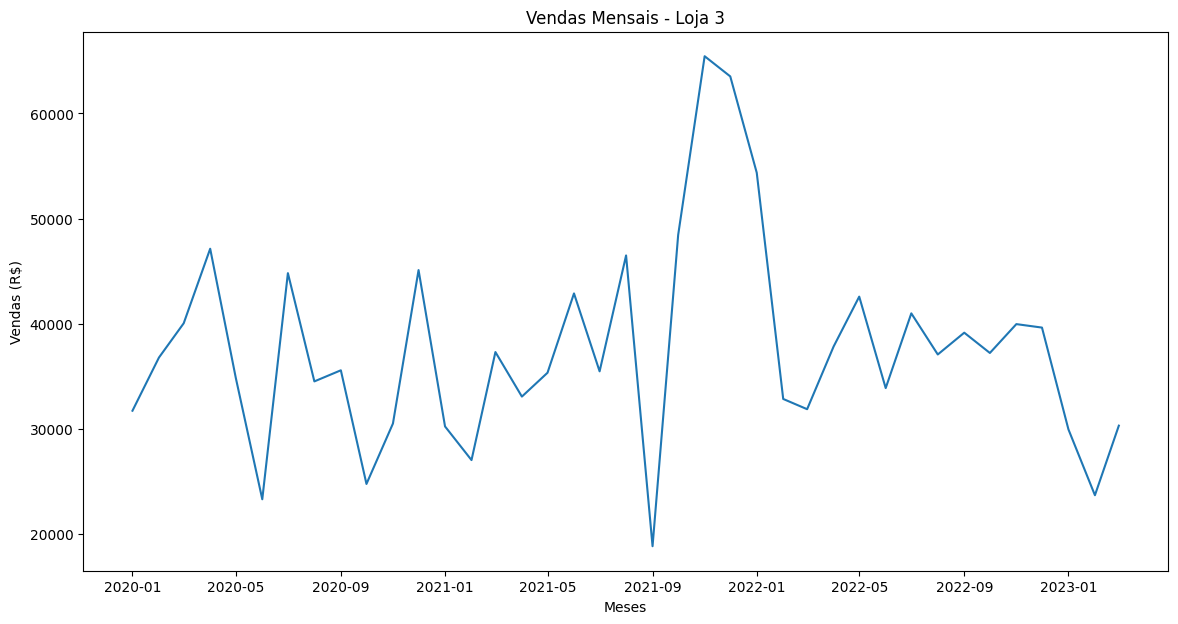

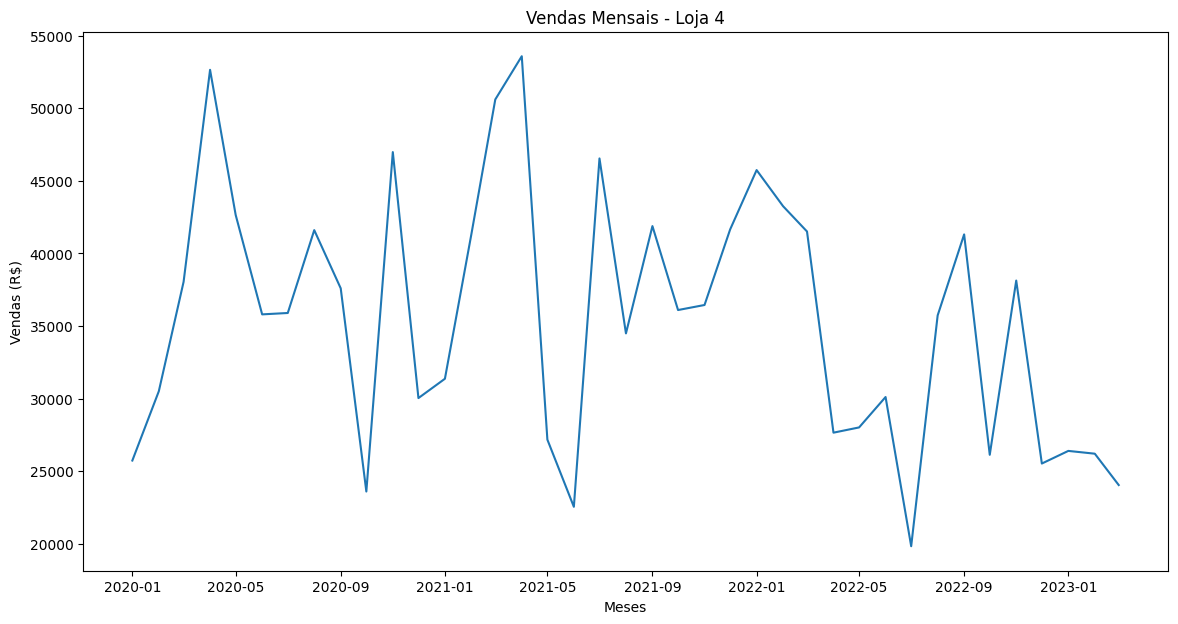

In [68]:
def plot_vendas_separado(meses, vendas, loja_nome):
    plt.figure(figsize=(14, 7))
    plt.plot(meses, vendas, label=f'Vendas - {loja_nome}')

    plt.title(f'Vendas Mensais - {loja_nome}')
    plt.xlabel('Meses')
    plt.ylabel('Vendas (R$)')

plot_vendas_separado(meses, vendas1, 'Loja 1')
plot_vendas_separado(meses, vendas2, 'Loja 2')
plot_vendas_separado(meses, vendas3, 'Loja 3')
plot_vendas_separado(meses, vendas4, 'Loja 4')


# 2. Vendas por Categoria


In [69]:
faturamento_por_categoria = lojas.groupby(['Categoria do Produto'])['faturamento'].sum().sort_values(ascending=False)
print(faturamento_por_categoria)


Categoria do Produto
eletronicos              2214099.72
eletrodomesticos         1766337.03
moveis                   1010214.00
instrumentos musicais     465029.67
esporte e lazer           190635.39
brinquedos                 98140.86
utilidades domesticas      76773.38
livros                     50260.74
Name: faturamento, dtype: float64


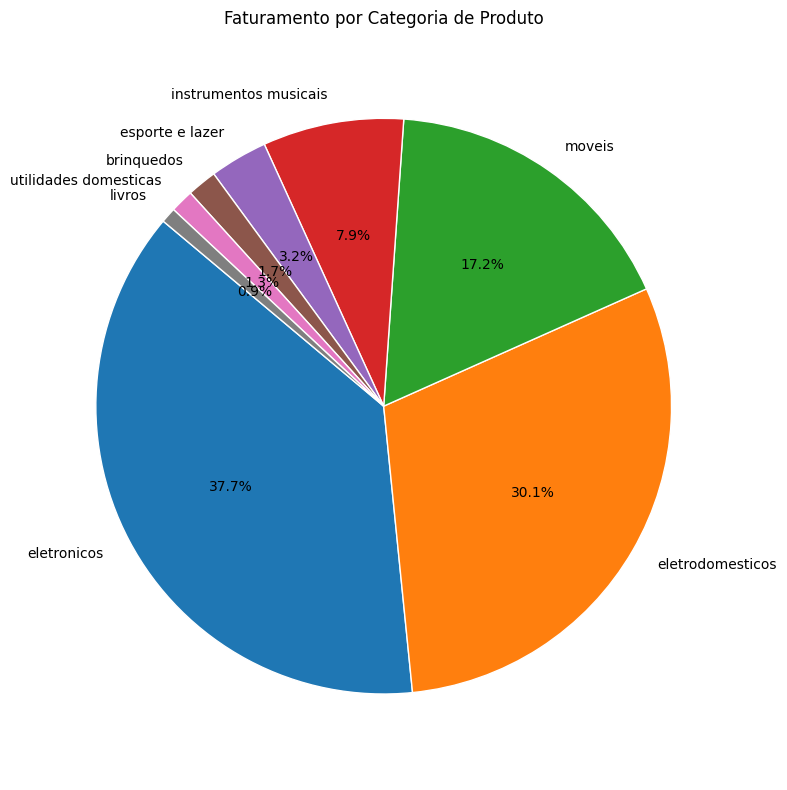

In [70]:
plt.figure(figsize=(8, 8))
plt.pie(
    faturamento_por_categoria,
    labels=faturamento_por_categoria.index,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'edgecolor': 'white'}
)
plt.title('Faturamento por Categoria de Produto')
plt.axis('equal')
plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas

In [71]:
avaliacao_media = lojas.groupby(['loja'])['Avaliação da compra'].mean().sort_values(ascending=False)
print(avaliacao_media)

loja
Loja 3    4.048326
Loja 2    4.037304
Loja 4    3.995759
Loja 1    3.976685
Name: Avaliação da compra, dtype: float64


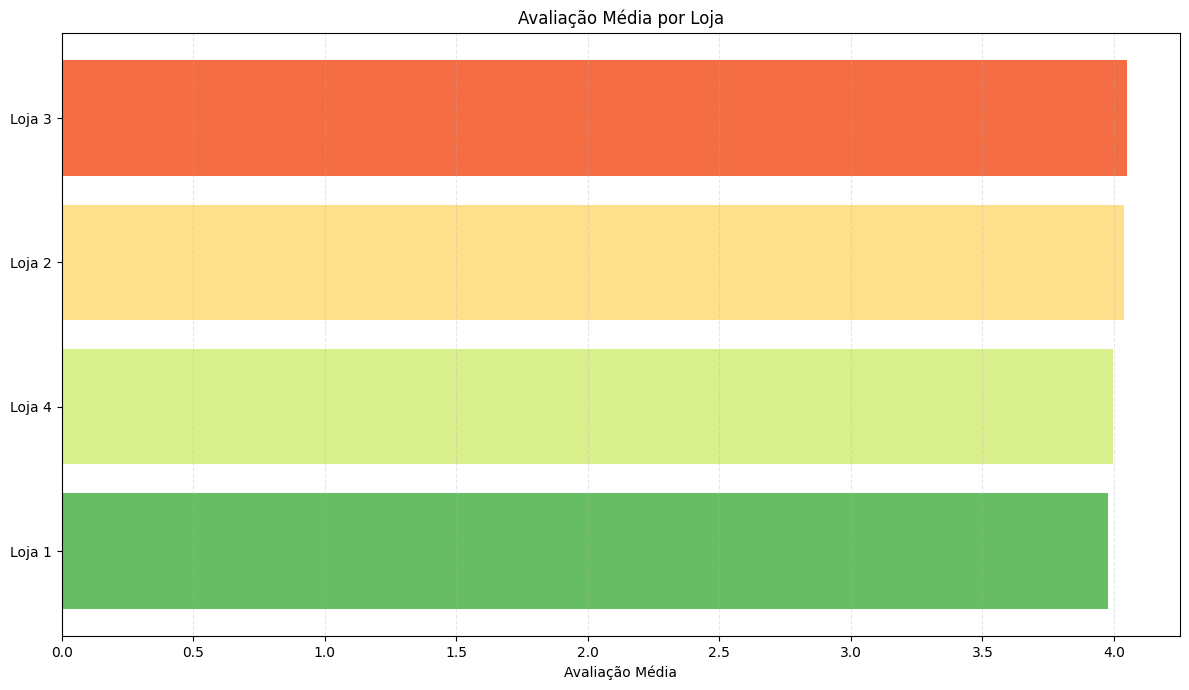

In [72]:
colors = sns.color_palette("RdYlGn", len(avaliacao_media))

plt.figure(figsize=(12, 7))
bars = plt.barh(avaliacao_media.index, avaliacao_media.values, color=colors)


plt.xlabel('Avaliação Média')
plt.title('Avaliação Média por Loja')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


# 4. Produtos Mais e Menos Vendidos

In [73]:
produto_mais_vendido = lojas['Produto'].value_counts().idxmax()
produto_menos_vendido = lojas['Produto'].value_counts().idxmin()
quantidade_mais_vendida = lojas['Produto'].value_counts().max()
quantidade_menos_vendida = lojas['Produto'].value_counts().min()
print(produto_mais_vendido, quantidade_mais_vendida)
print(produto_menos_vendido, quantidade_menos_vendida)

Cômoda 210
Celular ABXY 157


<ipython-input-74-143a539fb931>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=quantidades, y=produtos, palette=['green', 'red'])


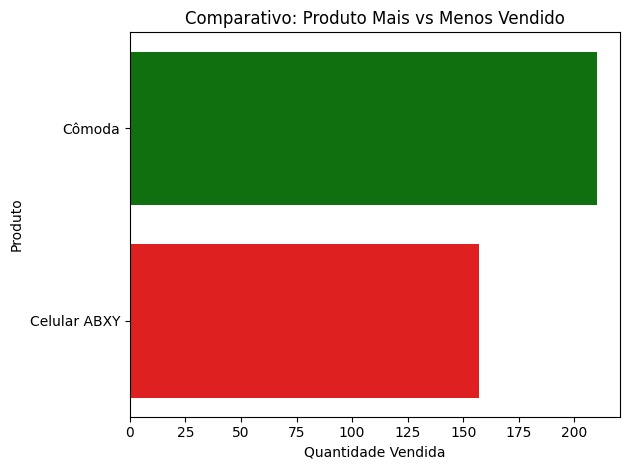

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

produtos = [produto_mais_vendido, produto_menos_vendido]
quantidades = [quantidade_mais_vendida, quantidade_menos_vendida]


sns.barplot(x=quantidades, y=produtos, palette=['green', 'red'])

plt.title('Comparativo: Produto Mais vs Menos Vendido')
plt.xlabel('Quantidade Vendida')
plt.ylabel('Produto')
plt.tight_layout()
plt.show()


# 5. Frete Médio por Loja


In [75]:
frete_medio_loja1 = loja['Frete'].mean()
frete_medio_loja2 = loja2['Frete'].mean()
frete_medio_loja3 = loja3['Frete'].mean()
frete_medio_loja4 = loja4['Frete'].mean()
print(frete_medio_loja1, frete_medio_loja2, frete_medio_loja3, frete_medio_loja4 )

34.69180491551149 33.62194065817927 33.07446427411743 31.278997081841727


6. **LOCALIZAÇÕES**

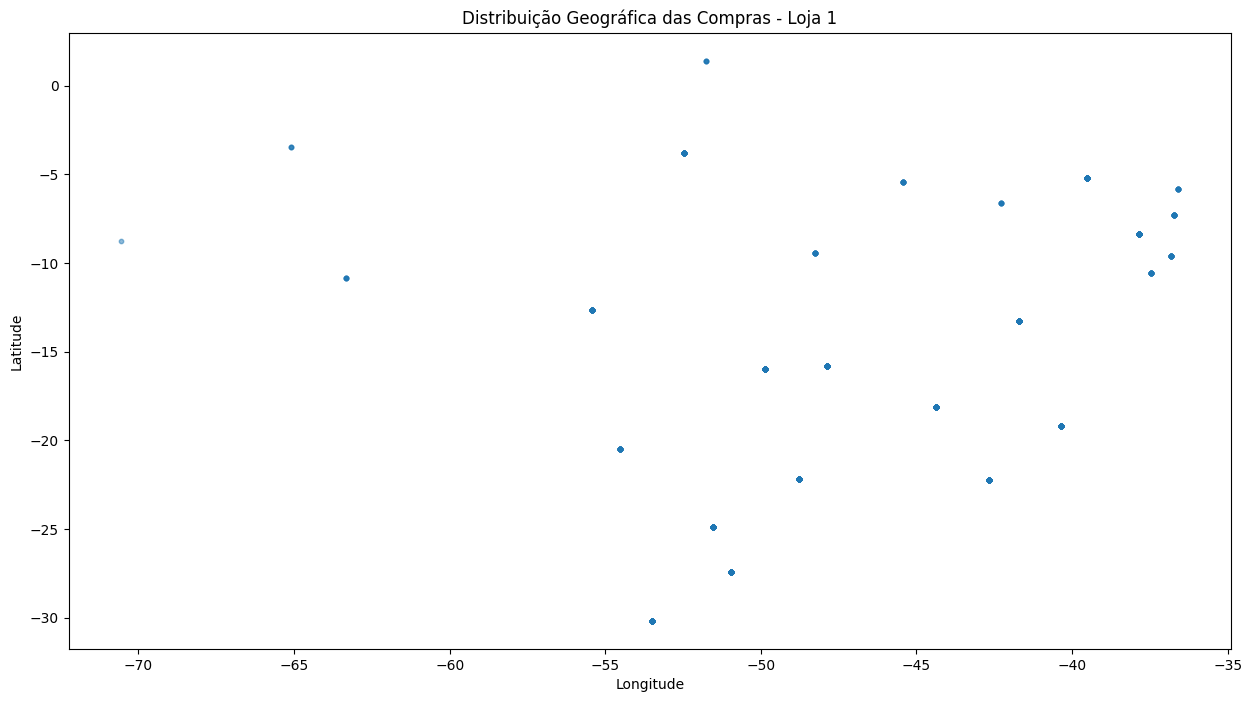

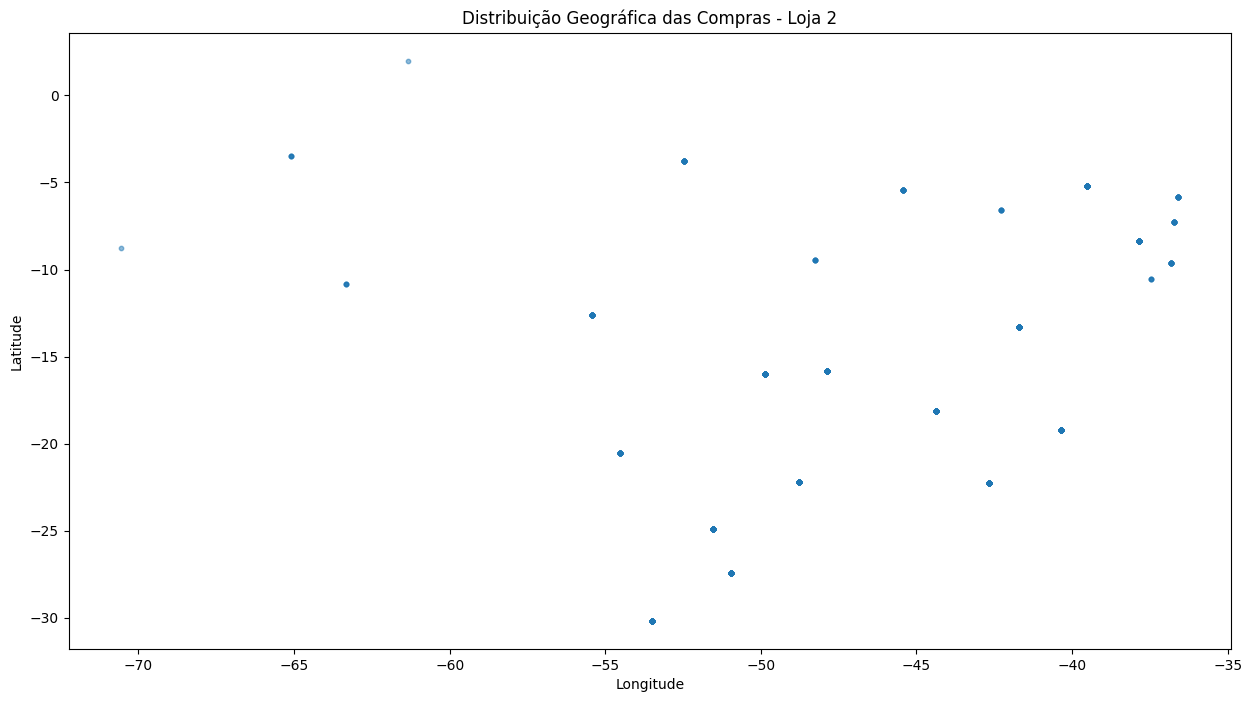

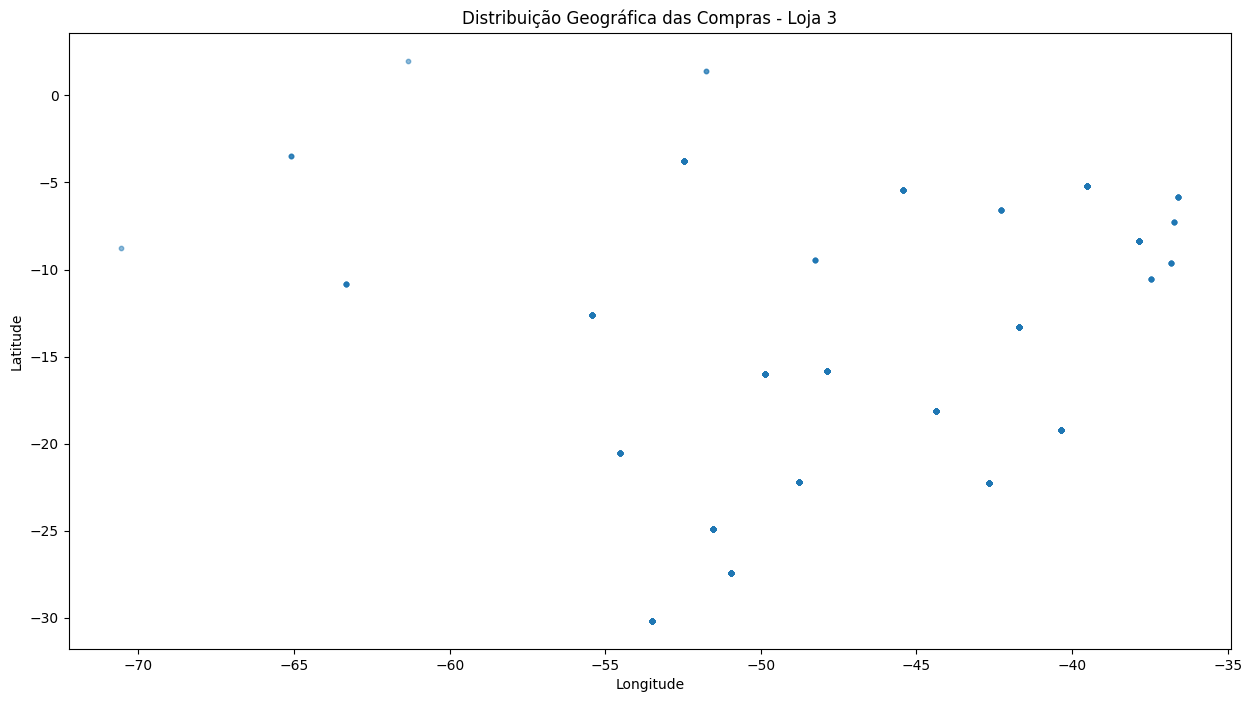

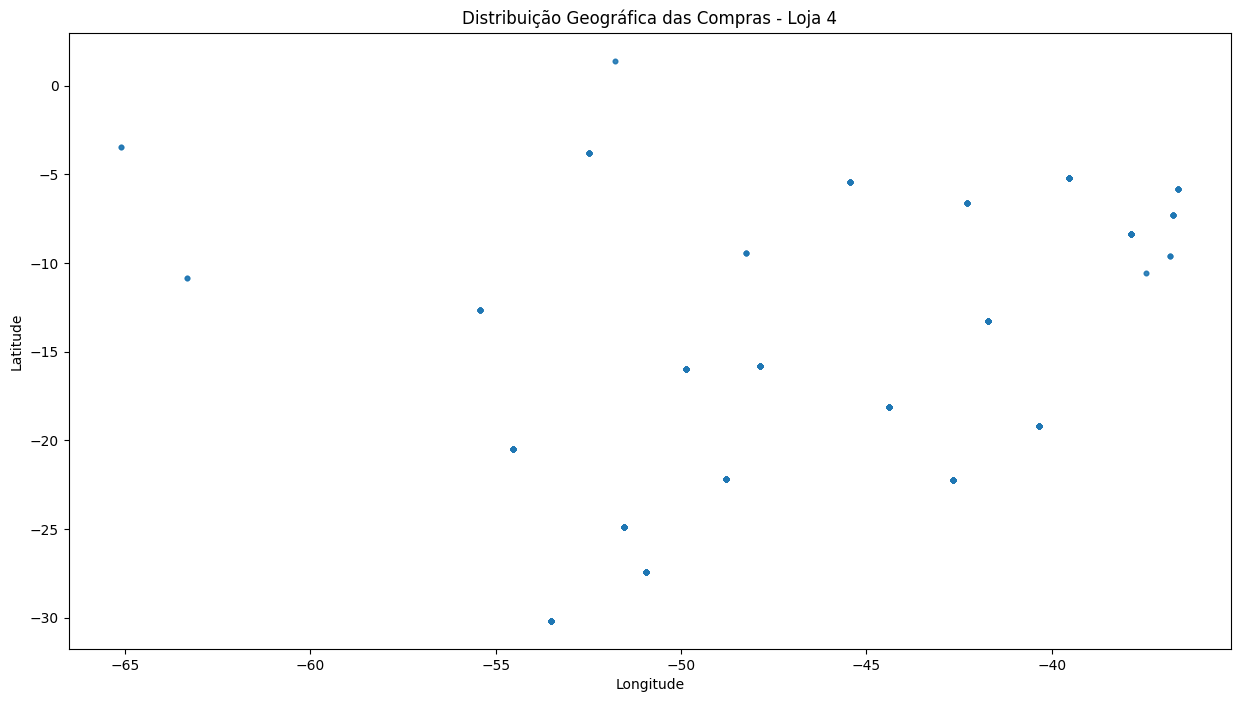

In [76]:
import matplotlib.pyplot as plt

def plot_geolocalizacao(loja, nome_loja):
    plt.figure(figsize=(15, 8))
    scatter = plt.scatter(loja['lon'], loja['lat'],alpha=0.5, s=10)

    plt.title(f"Distribuição Geográfica das Compras - {nome_loja}")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")

    plt.show()

plot_geolocalizacao(loja, 'Loja 1')
plot_geolocalizacao(loja2, 'Loja 2')
plot_geolocalizacao(loja3, 'Loja 3')
plot_geolocalizacao(loja4, 'Loja 4')

